**Importing the Libraries**

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [349]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Getting to know the dataset**

In [352]:
df.variety.value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

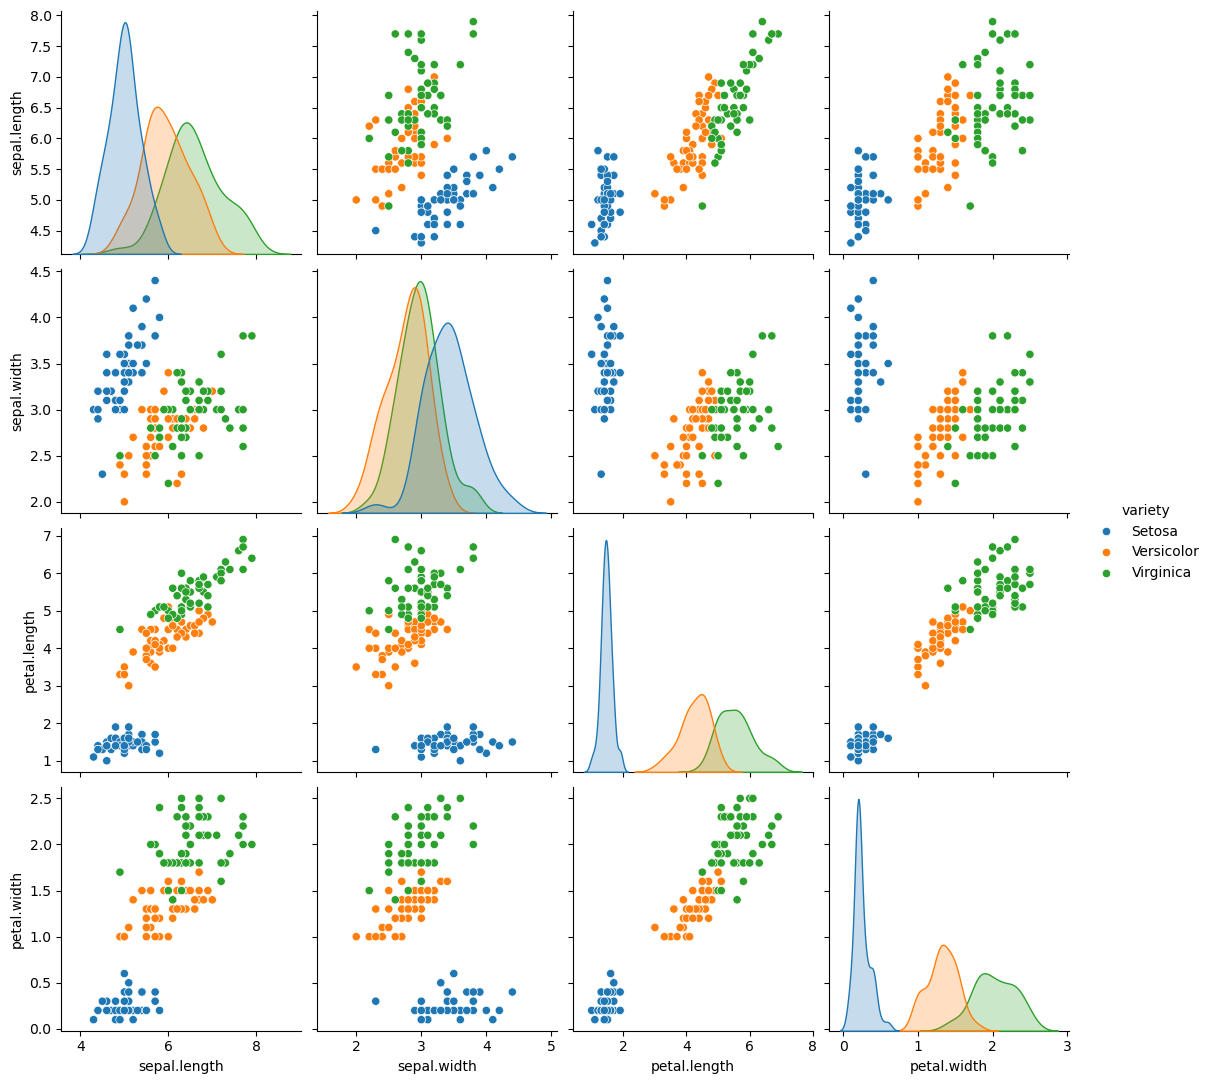

In [357]:
sns.pairplot(df, hue = "variety", height= 2.75)

*The variable that has the most relationship with the target var is the petal width. The separation of flower types is very delineated. It has a high correlation with petal lenght var, Setosa flower is more prominent. The var with the slightest relationship with the target var is the sepal properties. In sepal width var, there is high corr between the petal properties. That means we can drop one of them.*

In [359]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [360]:
df["variety_num"] = df["variety"]

In [361]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
4,5.0,3.6,1.4,0.2,Setosa,Setosa


In [366]:
df["variety_num"] = df["variety_num"].str.replace("Setosa", "1")
df["variety_num"] = df["variety_num"].str.replace("Versicolor", "2")
df["variety_num"] = df["variety_num"].str.replace("Virginica", "3")

In [368]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   variety_num   150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [372]:
df["variety_num"] = pd.to_numeric(df["variety_num"], downcast = "integer")

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   variety_num   150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


In [376]:
df_onlynumeric = df.drop("variety", axis = 1)

<Axes: >

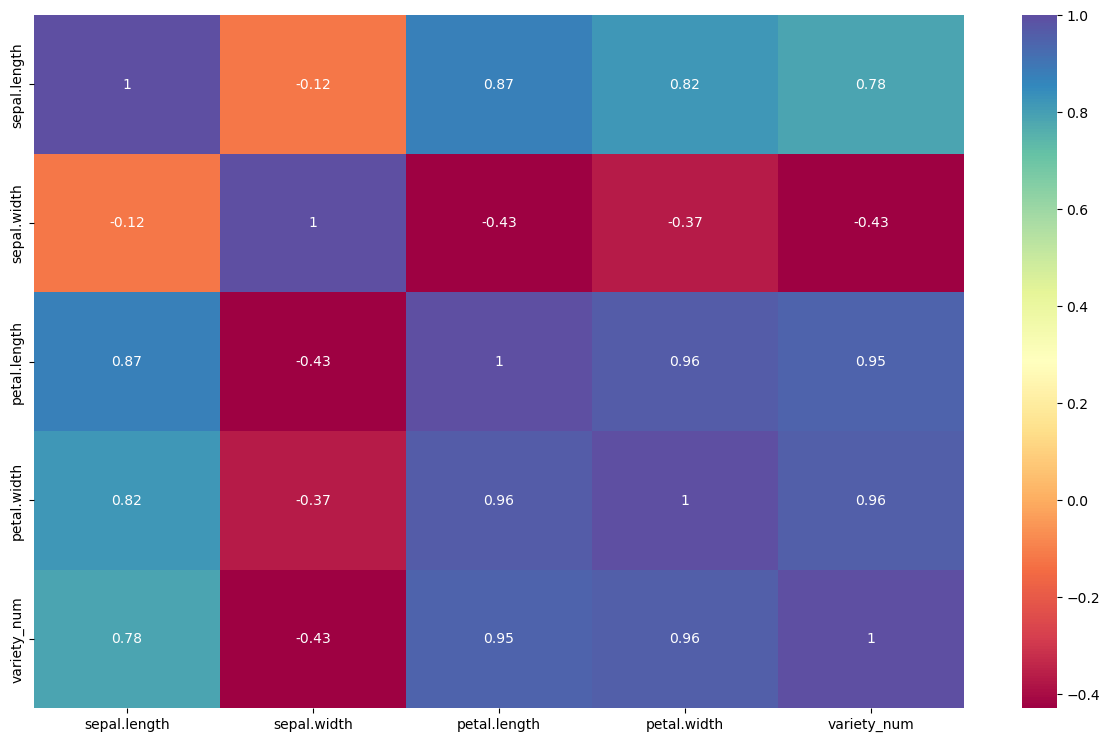

In [378]:
plt.figure(figsize = (15,9))
sns.heatmap(df_onlynumeric.corr(), cmap = "Spectral", annot = True)

In [380]:
df.drop(["petal.length", "variety_num"], axis = 1, inplace = True)

In [382]:
df.head()

,sepal.length,sepal.width,petal.width,variety
0,5.1,3.5,0.2,Setosa
1,4.9,3.0,0.2,Setosa
2,4.7,3.2,0.2,Setosa
3,4.6,3.1,0.2,Setosa
4,5.0,3.6,0.2,Setosa


**Decision Tree Modelling**

In [385]:
x = df.drop(["variety"], axis = 1)
y = df.variety

In [387]:
from sklearn.model_selection import train_test_split

In [389]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [391]:
from sklearn.tree import DecisionTreeClassifier

In [393]:
dt_model = DecisionTreeClassifier()

In [395]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [397]:
y_pred = dt_model.predict(x_test)

In [399]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [401]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9736842105263158


In [403]:
from sklearn.model_selection import cross_val_score

In [405]:
cv_scores = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8825757575757575

In [407]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.72727273])

In [409]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

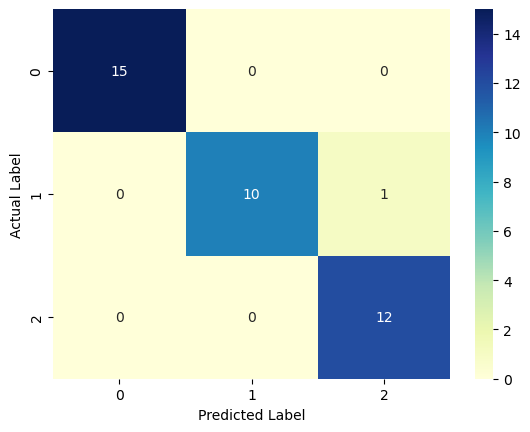

In [411]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [413]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [415]:
from sklearn import tree

In [417]:
list(df.columns[:-1])

['sepal.length', 'sepal.width', 'petal.width']

In [419]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]
print(features)
print(targets)

['sepal.length', 'sepal.width', 'petal.width']
['setosa', 'versicolor', 'virginica']


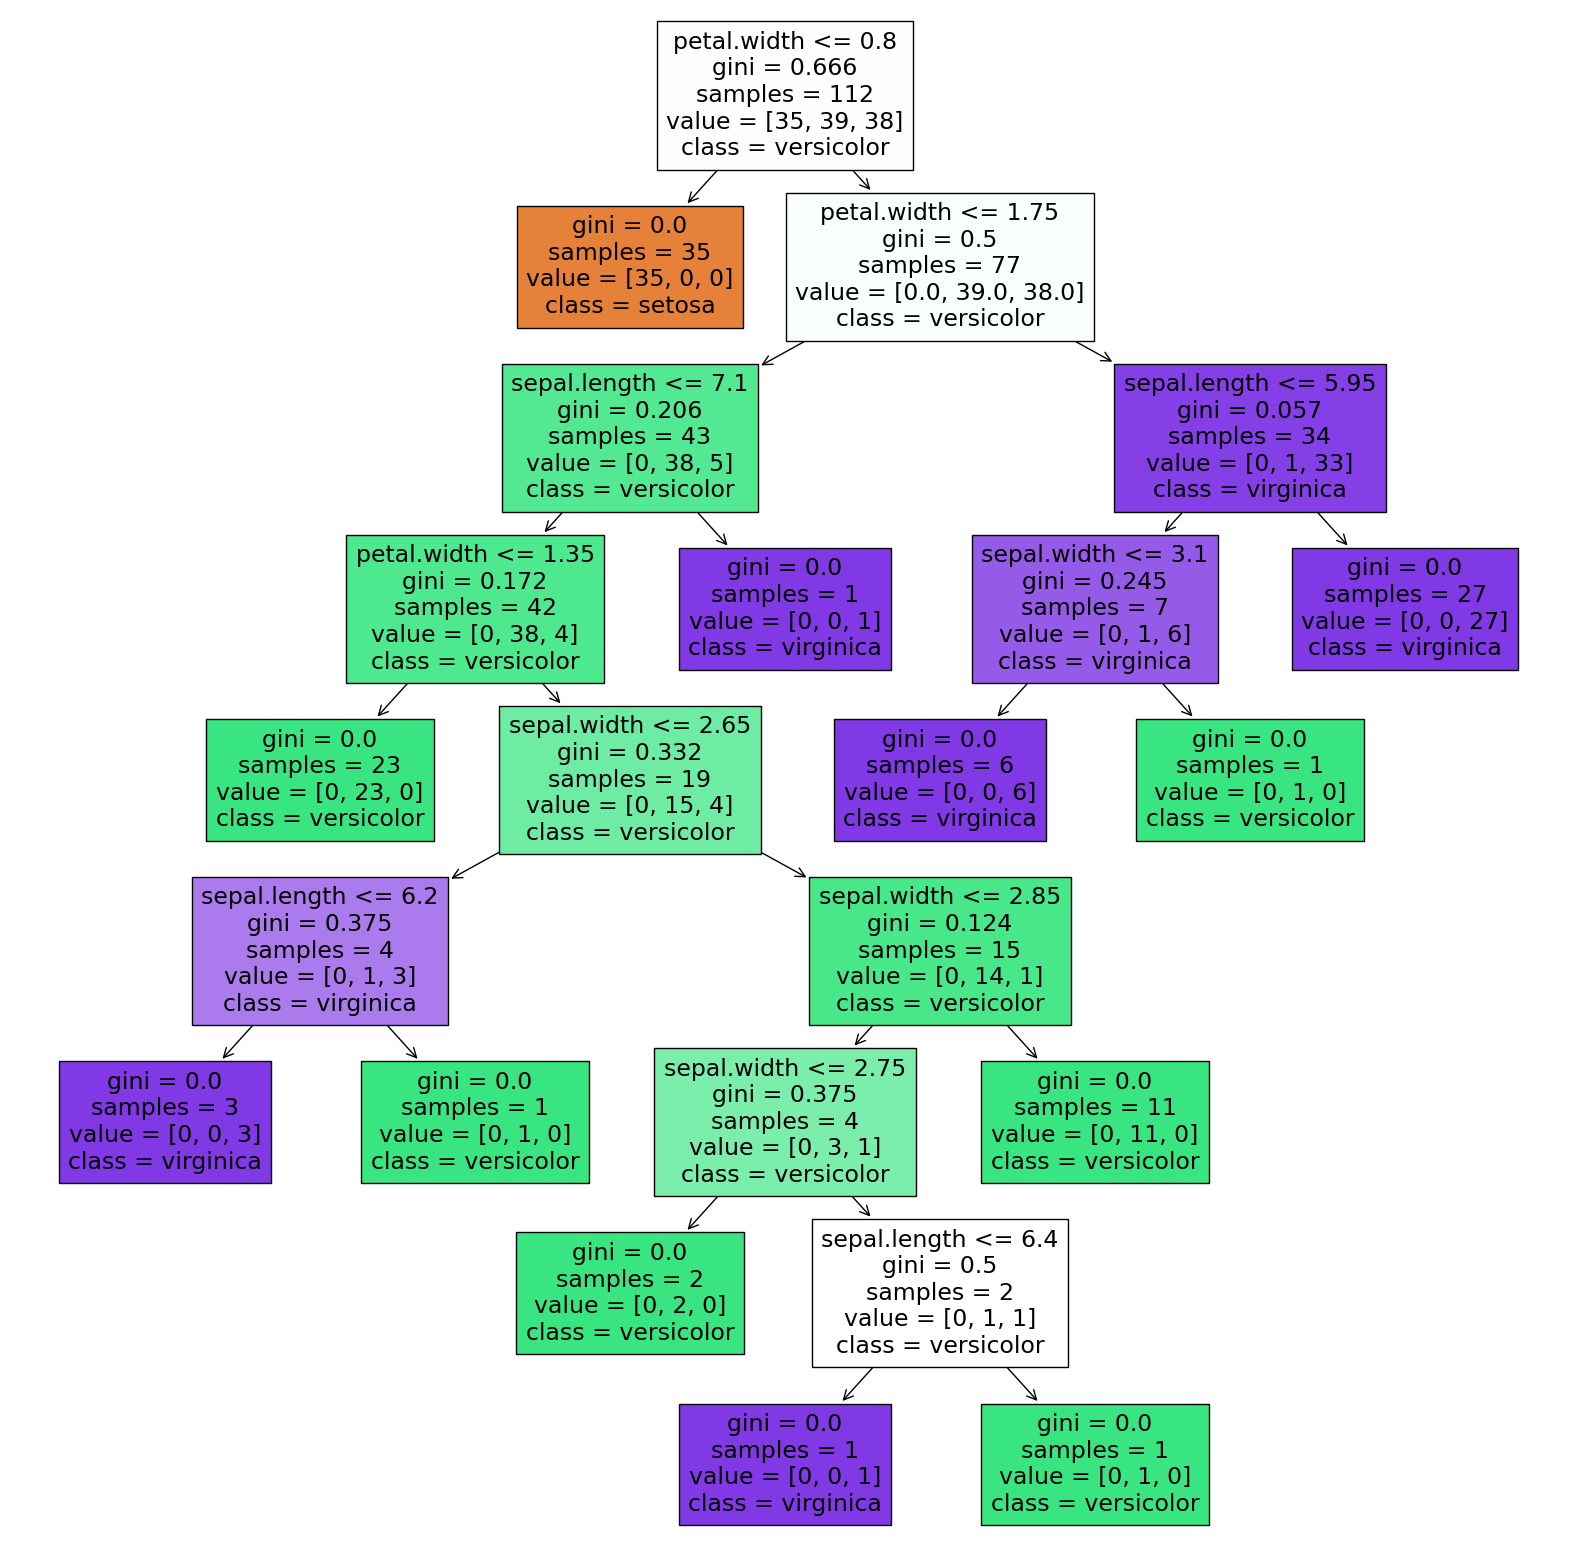

In [421]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_model, filled = True, feature_names = features, class_names = targets)

**Hyperparameter Optimization with Python**

In [424]:
from sklearn.model_selection import GridSearchCV

In [426]:
 dt_model2 = DecisionTreeClassifier()

In [428]:
dt_params = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(2, 14, 2),
            "max_features" : ["auto", "sqrt", "log2"]}

In [430]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_params, cv = 10)

In [432]:
dt_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [446]:
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt'}

In [448]:
dt_tuned = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, max_features = "sqrt")

In [450]:
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

In [452]:
y_pred = dt_tuned.predict(x_test)

In [454]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  1.0


In [456]:
cv_scores = cross_val_score(estimator = dt_tuned, X = x_train, y = y_train, cv = 10)
cv_scores.mean()

0.8833333333333332

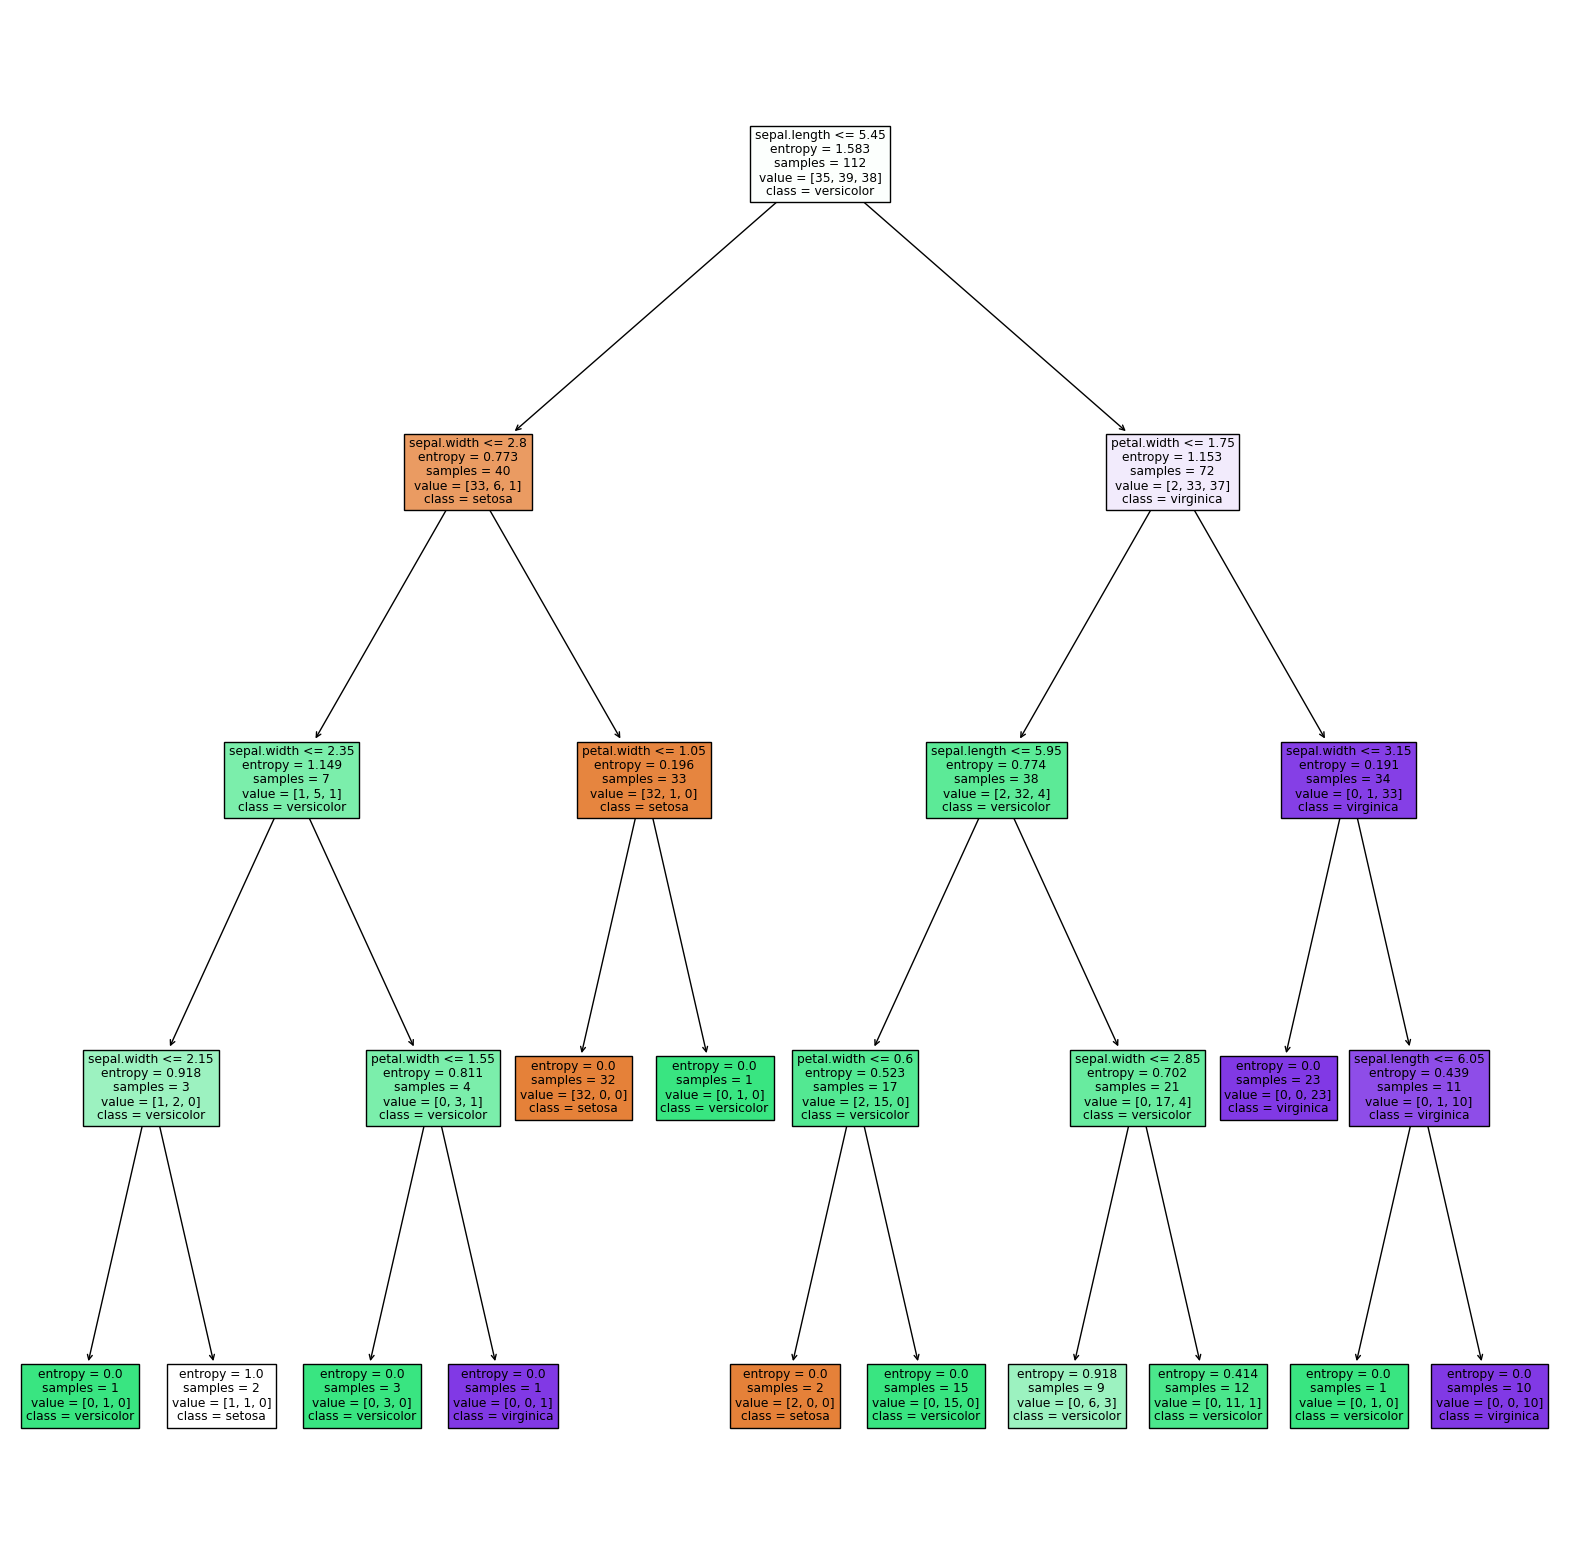

In [458]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_tuned, filled = True, feature_names = features, class_names = targets)